# Descriptive Statistics

This workbook is used to generate descriptive statistics for each detector station during June (the dataset we used to train our models).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('../data/I88N-processed/concat_no_holes/concat.csv')

In [3]:
raw_data.head(3)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00,33395
1,408907,2017-04-30 00:05:00,1.1,42.0,67.5,04/30/2017,00:05,33396
2,408907,2017-04-30 00:10:00,1.0,41.0,68.1,04/30/2017,00:10,33397


In [4]:
# select the ones in June
raw_data.drop(columns=['idx'], inplace=True)

In [5]:
raw_data.head(1)

,Station ID,datetime,Occupancy,Flow,Speed,Date,Time
0,408907,2017-04-30 00:00:00,0.6,26.0,68.4,04/30/2017,00:00


In [6]:
raw_data = raw_data.loc[(raw_data['Date'] >= "06/01/2017") & (raw_data['Date'] <= "06/30/2017")
                       & (raw_data['Date'] != "06/15/2017")]

In [7]:
stations = raw_data['Station ID'].unique().tolist()
var_names = ['occ', 'speed', 'flow']
var_column_names = ['Occupancy', 'Speed', 'Flow']
mean_sd_dict = dict()
for var in var_names:
    mean_sd_dict[var + "_mean"] = []
    mean_sd_dict[var + "_sd"] = []
mean_sd_dict['station'] = stations

for i, s in enumerate(stations):
    s_df = raw_data[raw_data['Station ID'] == s]
    for j, var in enumerate(var_names):
        var_values = s_df[var_column_names[j]].values
        mean_sd_dict[var + "_mean"].append(np.mean(var_values))
        mean_sd_dict[var + "_sd"].append(np.std(var_values))

In [8]:
mean_sd_df = pd.DataFrame(mean_sd_dict)

In [9]:
mean_sd_df.set_index('station', inplace=True)

In [10]:
mean_sd_df.to_csv('../data/descriptive_stats/mean_sd_june.csv')

## Visualize the distribution of mean and standard deviation

In [11]:
mean_sd_df.head(3)

,occ_mean,occ_sd,speed_mean,speed_sd,flow_mean,flow_sd
station,,,,,,
408907,3.889691,3.271416,66.591487,4.590010,153.157567,94.329658
400951,5.436530,4.736452,63.410225,7.189301,268.917864,156.767556
400057,8.051988,7.035746,58.642613,12.470605,256.963242,145.622322


In [12]:
descriptive_colors = {
    'mean': 'b',
    'sd': 'g'
}

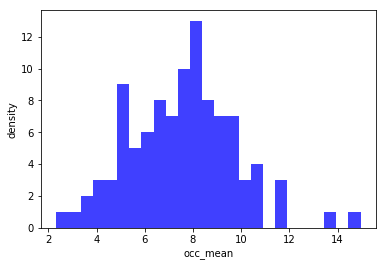

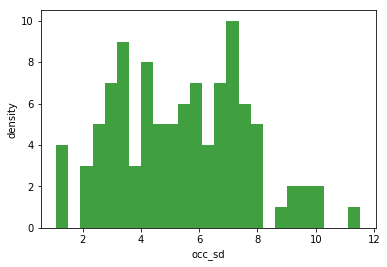

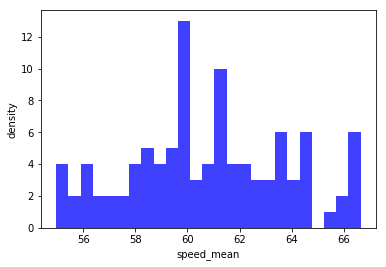

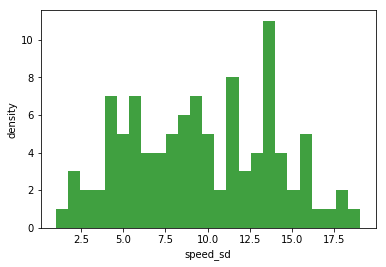

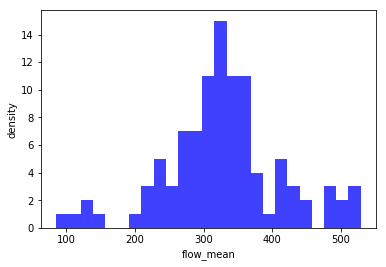

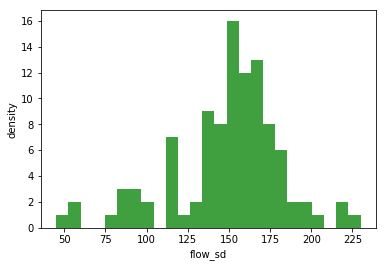

In [13]:
cols = mean_sd_df.columns.values.tolist()
for col in cols:
    des_stat = col.split('_')[1]
    n, bins, patches = plt.hist(mean_sd_df[col].values, 25, density=False, facecolor=descriptive_colors[des_stat], alpha=.75)
    plt.xlabel(col)
    plt.ylabel('density')
    plt.show()

## Mean-SD plot

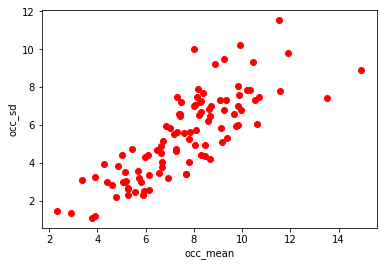

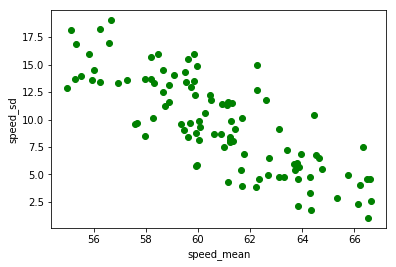

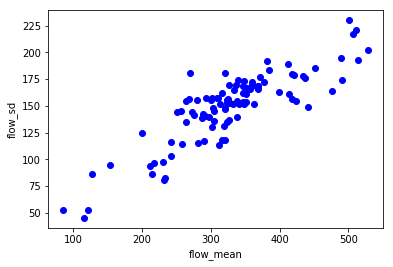

In [16]:
colors = ['ro', 'go', 'bo']
for i, var in enumerate(var_names):
    var_mean = var + '_mean'
    var_sd = var + '_sd'
    plt.plot(mean_sd_df[var_mean].values, mean_sd_df[var_sd].values, colors[i])
    plt.xlabel(var_mean)
    plt.ylabel(var_sd)
    plt.show()